In [1]:
import matplotlib.pyplot as plt
from getdist import plots, MCSamples
from getdist import *

# import planckStyle
import pylab
import numpy as np

import tkinter
import matplotlib.pyplot as plt
import matplotlib as mpl
import matplotlib.ticker
import matplotlib

import corner 
import fgivenx
from fgivenx import plot_contours, samples_from_getdist_chains
# matplotlib.use('TkAgg')
%matplotlib inline

### Two NLED models:

- Power law lagrangian:

    - $\omega_B = \frac{1}{3}+\frac{16 \alpha (\alpha-1) \gamma F^{\alpha}}{12 \alpha \gamma F^{\alpha}+3F}=\frac{1}{3}+\frac{16 \alpha (\alpha-1) \gamma a^{4-4 \alpha}}{12 \alpha \gamma a^{4-4 \alpha}+3}$
    
 
- Rational Lagrangian:

    - $\omega_B=\frac{4z^2+(4-24b)z+4b+1}{12z^2+(12+24b)z+12b+3}$

In [2]:
def eos_powerlaw(z, params):
    alfa = params
    a = z/(1+z)
    gamma = 1 
    num = 16*alfa*gamma*a**(4-4*alfa)+4
    den = 12*gamma*a**(4-4*alfa)+3
    return -1 + num/den

In [3]:
def eos_rational(z, params):
#     b, beta = params
    b  = params
    num = (4*z**2)+(4-24*b)*z+(4*b)+1
    den = (12*z**2)+(12+24*b)*z+(12*b)+3
    return num/den

In [4]:
def eos_array(k, samples, model='rational'):
    means =[]

    for z in k:
        l=[]
        for sample in samples:
            if model == 'rational':
                l.append(eos_rational(z, sample))
            elif model == 'powerlaw':
                l.append(eos_powerlaw(z, sample))
        l = np.array(l)
        means.append([z, np.mean(l), np.std(l)])
    means = np.array(means)
    np.shape(means)
    return means

In [5]:
dir_name = '/home/isidro/Documents/github/cosmo_tools/models/nled/chains_nled/'

roots = [
         'NLEDCosmology_phy_HD+Pantheon+CBAO+Planck_15_nested_multi',
  ]

roots2 = [
         'NLED2Cosmology_phy_HD+Pantheon+CBAO+Planck_15_nested_multi',
  ]
# 
# roots_bao = ['NLED_phy_CBAO_nested_multi', 'NLED_phy_HD+SN+CBAO_nested_multi']


### Power-law lagrangian

In [6]:
g = plots.getSinglePlotter(chain_dir = dir_name, width_inch= 10,
                          ratio = 0.9, 
                          analysis_settings={'smooth_scale_2D': 0.7,
                                             'smooth_scale_1D': 0.7, 
                                             'ignore_rows': 0.01})

<Figure size 720x648 with 0 Axes>

<Figure size 1080x1080 with 0 Axes>

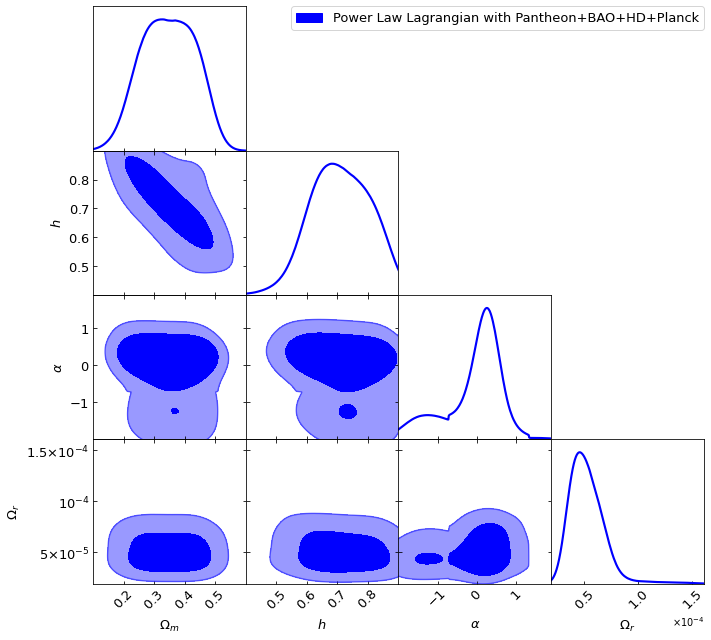

In [27]:
fig = plt.figure(figsize=(15, 15))
#g.settings.axes_fontsize = 5
g.settings.lab_fontsize = 15
g.settings.x_label_rotation= 45
#g.settings.alpha_filled_add = 0.9
g.settings.legend_fontsize = 15
g.settings.axes_fontsize = 15   
g.settings.lw1 = 3
g.settings.linewidth_contour = 2


g.triangle_plot(roots2, ['Om','h', 'alfa', 'Omrad'],               
                diag1d_kwargs={'colors':['blue', 'red'], 
                               'alphas':[1, 1, 1]},
                colors=['blue', 'red'],
                alphas = [1, 1, 1],
                legend_labels=['Power Law Lagrangian with Pantheon+BAO+HD+Planck'],
                legend_loc='upper right',
                filled = True,
                normalized=False, 
                shaded=False, 
                param_limits={'h': [0.4, 0.9], 'Om':[0.1, 0.6]},                
                
           )

# g.add_text('Quintom with $\\beta$', x= 0.35, y= 2.5, fontsize=14)
#            \n 350 live points \n 0.2 burn', 0.1, 2)        
# plt.savefig('nled_250lp.png', dpi=300)
plt.savefig('img/nled_Pantheon_BAO_HD_Plank_power_law.png', dpi=300)

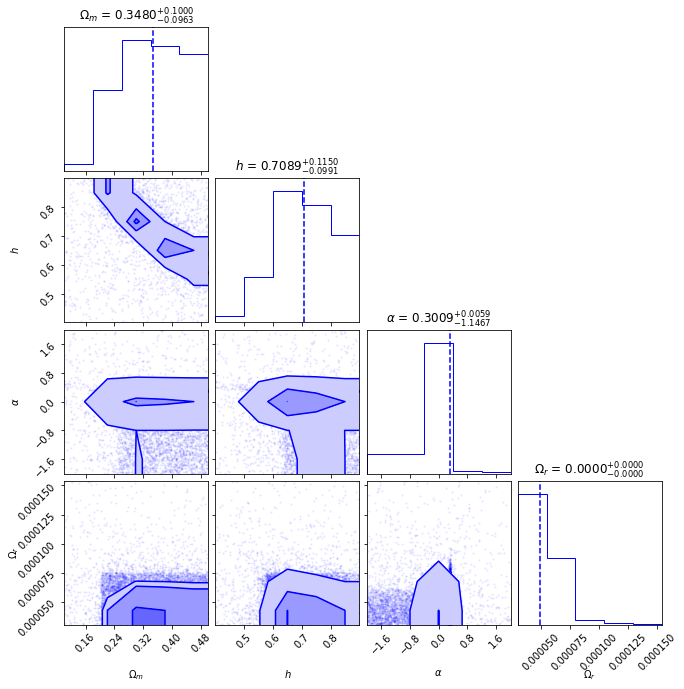

In [8]:
data = np.loadtxt(dir_name+'NLED2Cosmology_phy_HD+Pantheon+CBAO+Planck_15_nested_multi_1.txt', usecols=[2,4,5,9])

corner.corner(data, labels=["$\Omega_m$", "$h$","$\\alpha$", "$\\Omega_r$"],
                       bins = 5,
                       weights = None,
                       color='b',
                       quantiles=[0.5],
                       show_titles=True, 
                       title_fmt = '.4f',
                       smooth=False, 
                       fill_contours = True,
                       title_kwargs={"fontsize": 12})
plt.savefig("corner_nled2_nested.png", dpi=200)

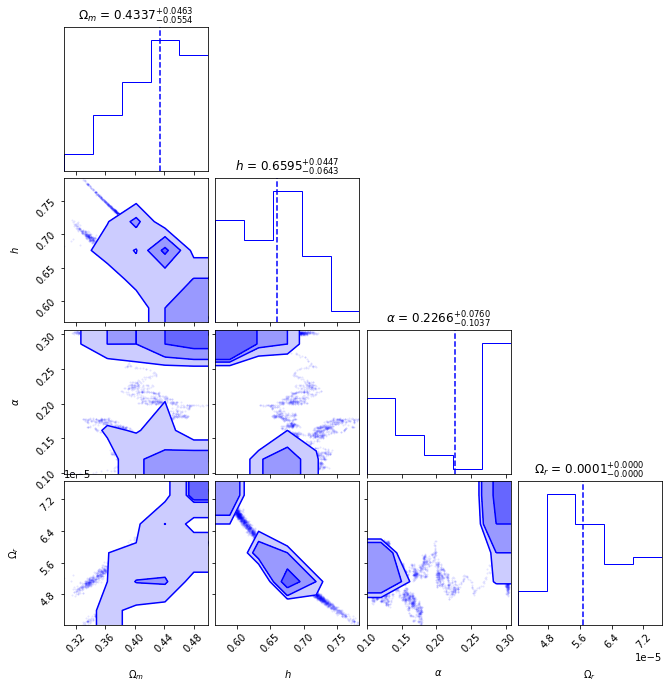

In [9]:
data = np.loadtxt(dir_name+'NLED2Cosmology_phy_HD+Pantheon+CBAO+Planck_15_mcmc_1.txt', usecols=[2,4,5,9])
# weights = np.loadtxt(dir_name+'NLED2Cosmology_phy_HD+Pantheon+CBAO+Planck_15_mcmc_1.txt', usecols=[0])

corner.corner(data, labels=["$\Omega_m$", "$h$","$\\alpha$", "$\\Omega_r$"],
                       bins = 5,
                       weights = None,
#                        weights = weights,
                       color='b',
                       quantiles=[0.5],
                       show_titles=True, 
                       title_fmt = '.4f',
                       smooth=False, 
                       fill_contours = True,
                       title_kwargs={"fontsize": 12})
plt.savefig("corner_nled2_mcmc.png", dpi=200)

In [10]:
cmap_reversed = matplotlib.cm.get_cmap('Blues_r')

In [13]:
file_root = dir_name + 'NLED2Cosmology_phy_HD+Pantheon+CBAO+Planck_15_nested_multi'

samples, weights = samples_from_getdist_chains(['alfa'], file_root)

k = np.linspace(0, 2.5, 10)


  0%|          | 0/11437 [00:00<?, ?it/s]

<ipython-input-2-9e7ec7ccf54b>:5: RuntimeWarning: divide by zero encountered in power
  num = 16*alfa*gamma*a**(4-4*alfa)+4
<ipython-input-2-9e7ec7ccf54b>:6: RuntimeWarning: divide by zero encountered in power
  den = 12*gamma*a**(4-4*alfa)+3
<ipython-input-2-9e7ec7ccf54b>:7: RuntimeWarning: invalid value encountered in divide
  return -1 + num/den


  0%|          | 0/10 [00:00<?, ?it/s]

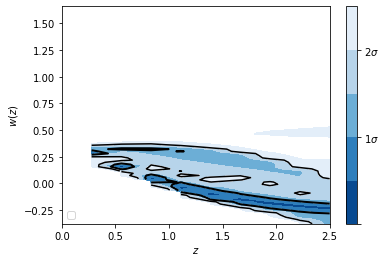

In [14]:
cbar = plot_contours(eos_powerlaw, k, samples, weights=weights, colors=cmap_reversed, contour_line_levels=[1,2],  
                     linewidths=[2, 1.5])

cbar = plt.colorbar(cbar,ticks=[0,1,2])
cbar.set_ticklabels(['',r'$1\sigma$',r'$2\sigma$'])

# plt.hlines(-1, xmin=0, xmax=10, colors='r',  linestyles='dashed', label='$w=-1$', lw=2)

plt.ylabel(r'$w(z)$')
plt.xlabel(r'$z$')
# plt.ylim(0.333335,0.333335)

# plt.tight_layout()
plt.yticks()

plt.legend(loc='lower left')
# plt.text(0,-1.6, 'CC+JLA+$f\sigma_8$', fontsize=13)
plt.savefig('NLED_power_law_EoS_fg.png', dpi=200)



<ipython-input-2-9e7ec7ccf54b>:5: RuntimeWarning: invalid value encountered in power
  num = 16*alfa*gamma*a**(4-4*alfa)+4
<ipython-input-2-9e7ec7ccf54b>:6: RuntimeWarning: invalid value encountered in power
  den = 12*gamma*a**(4-4*alfa)+3


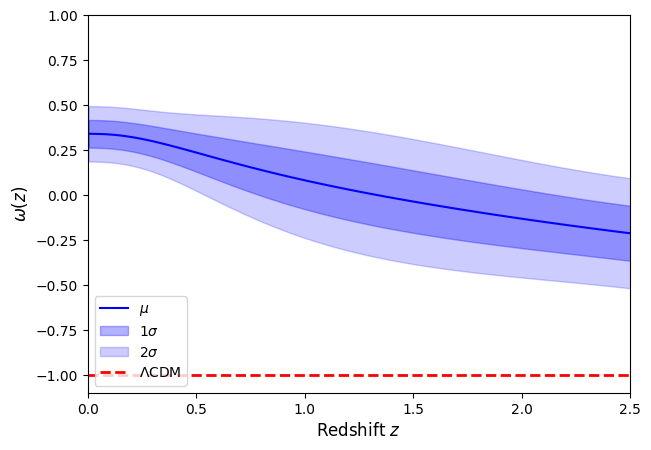

In [15]:
fig = plt.figure(figsize=(7, 5), dpi=100)

k = np.linspace(-0.1, 2.5, 100)
means = eos_array(k, samples, model='powerlaw')
plt.plot(k, means[:, 1], '-', c='b', label='$\mu$')
plt.fill_between(k, means[:, 1] - means[:, 2], means[:, 1] + means[:, 2], alpha=0.3, color='b', label='$1\sigma$')
plt.fill_between(k, means[:, 1] - 2*means[:, 2] , means[:, 1] + 2*means[:, 2], alpha=0.2, color='b', label='$2\sigma$')
plt.ylim(-1.1, 1)
plt.xlim(0, 2.5)
plt.hlines(y=-1, xmin=0, xmax=2.5, linestyles='--', lw=2, color='r', label='$\Lambda$CDM')
plt.legend(loc='lower left')
plt.xlabel("Redshift $z$", fontsize=12)
plt.ylabel("$\\omega(z)$", fontsize=12)
plt.savefig('NLED_power_law_EoS.png', dpi=200)

In [16]:
samples = g.sampleAnalyser.samplesForRoot('NLED2Cosmology_phy_HD+Pantheon+CBAO+Planck_15_nested_multi')

p = samples.getParams()
print('mean, err = ', samples.mean(p.Om), samples.std(p.Om))
print('95% limits: ',samples.twoTailLimits(p.Om, 0.95))
# print(samples.likeStats)

print('mean, err = ', samples.mean(p.h), samples.std(p.h))
print('95% limits: ',samples.twoTailLimits(p.h, 0.95))

print('mean, err = ', samples.mean(p.Omrad), samples.std(p.Omrad))
print('95% limits: ',samples.twoTailLimits(p.Omrad, 0.95))

print('mean, err = ', samples.mean(p.alfa), samples.std(p.alfa))
print('95% limits: ',samples.twoTailLimits(p.alfa, 0.95))

# roots = [
#          'NLEDCosmology_phy_Pantheon+CBAO_mcmc',
#   ]

# roots2 = [
#          'NLED2Cosmology_phy_Pantheon+CBAO_mcmc',
#   ]
# # 

mean, err =  0.34806200047125324 0.08662298491823622
95% limits:  [0.20426107 0.49130328]
mean, err =  0.7133255846867437 0.09745028011600453
95% limits:  [0.54095975 0.8858719 ]
mean, err =  5.160998939803414e-05 1.574190386210584e-05
95% limits:  [3.15099609e-05 8.45006017e-05]
mean, err =  -0.06792873159408887 0.6644154403316374
95% limits:  [-1.82058346  0.33693255]


## Rational Lagrangian

In [17]:
g = plots.getSinglePlotter(chain_dir = dir_name, width_inch= 10,
                          ratio = 0.9, 
                          analysis_settings={'smooth_scale_2D': 0.6,
                                             'smooth_scale_1D': 0.6, 
                                             'ignore_rows': 0.0})

<Figure size 720x648 with 0 Axes>

<Figure size 1080x1080 with 0 Axes>

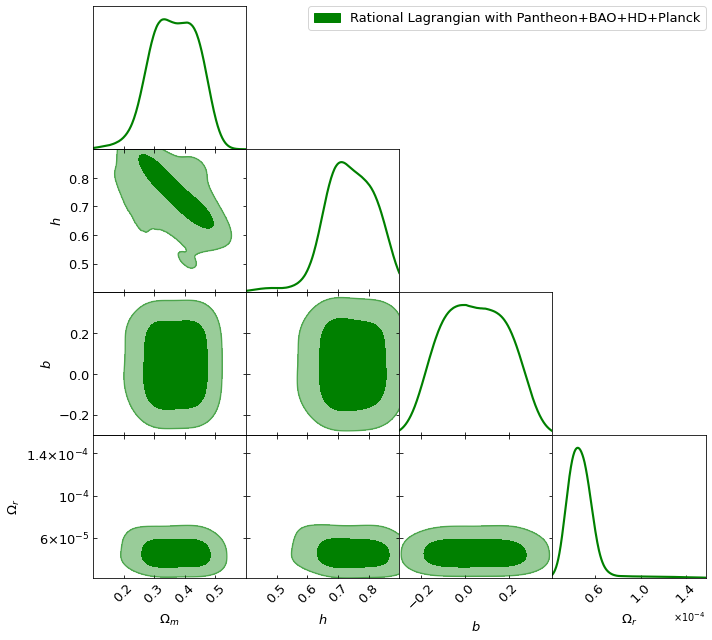

In [18]:
fig = plt.figure(figsize=(15, 15))
#g.settings.axes_fontsize = 5
g.settings.lab_fontsize = 15
g.settings.x_label_rotation= 45
#g.settings.alpha_filled_add = 0.9
g.settings.legend_fontsize = 15
g.settings.axes_fontsize = 15   
g.settings.lw1 = 3
g.settings.linewidth_contour = 2


# g.triangle_plot(roots, ['Om','h', 'b', 'beta', 'Omrad'],               
g.triangle_plot(roots, ['Om','h', 'b', 'Omrad'],     
                diag1d_kwargs={'colors':['green', 'blue', 'red'], 
                               'alphas':[1, 1, 1]},
                colors=['green', 'blue', 'red'],
                alphas = [1, 1, 1],
                legend_labels=['Rational Lagrangian with Pantheon+BAO+HD+Planck'],
                legend_loc='upper right',
                filled = True,
                normalized=False, 
                shaded=False, 
                param_limits={'h': [0.4, 0.9], 'Om':[0.1, 0.6], 'b':[-0.3, 0.4]},
                
#                 parampriors={'mquin': [0, 3], 'mphan':[0, 2], 'beta':[-8, 12]}
           )

# g.add_text('Quintom with $\\beta$', x= 0.35, y= 2.5, fontsize=14)
#            \n 350 live points \n 0.2 burn', 0.1, 2)        
# plt.savefig('nled_250lp.png', dpi=300)
plt.savefig('img/nled_Pantheon_BAO_HD_Plank_racional.png', dpi=300)

Nested Sampling, HD+Pantheon+CBAO+Planck_15, rational Lagrangian


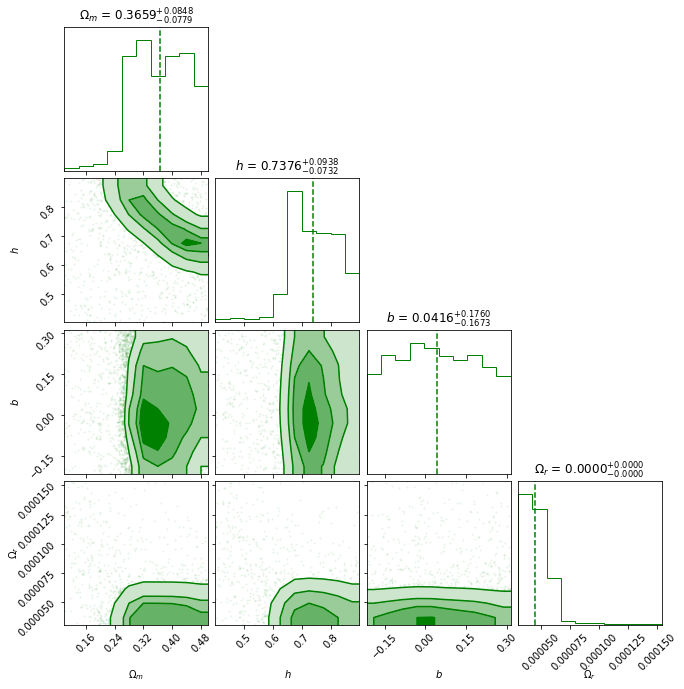

In [19]:
data = np.loadtxt(dir_name+'NLEDCosmology_phy_HD+Pantheon+CBAO+Planck_15_nested_multi_1.txt', usecols=[2,4,5, 10])
corner.corner(data, labels=["$\Omega_m$", "$h$","$b$", "$\\Omega_r$"],
                       bins = 10,
                       weights = None,
#                        weights = weights,
                       color='g',
                       quantiles=[0.5],
                       show_titles=True, 
                       title_fmt = '.4f',
                       smooth=True, 
                       fill_contours = True,
                       title_kwargs={"fontsize": 12})
print("Nested Sampling, HD+Pantheon+CBAO+Planck_15, rational Lagrangian")

plt.savefig("corner_nled1_nested.png", dpi=200)

MCMC, HD+Pantheon+CBAO+Planck_15, rational Lagrangian


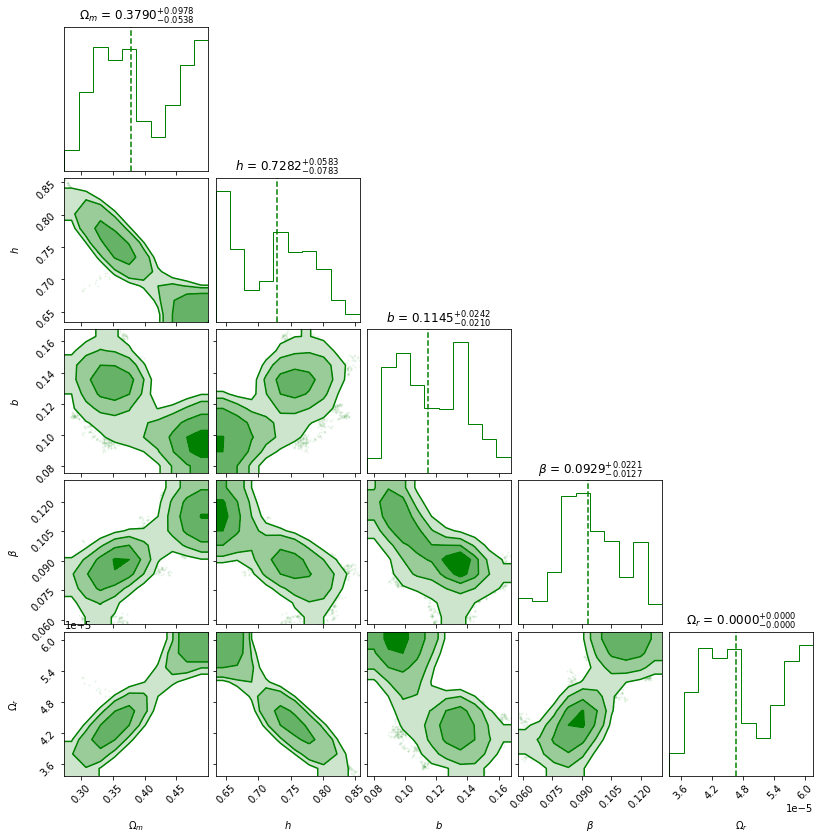

In [20]:
# data = np.loadtxt(dir_name+'NLEDCosmology_phy_HD+Pantheon+CBAO+Planck_15_nested_multi_1.txt', usecols=[2,4,5,6])
# weights = np.loadtxt(dir_name+'NLEDCosmology_phy_HD+Pantheon+CBAO+Planck_15_nested_multi_1.txt', usecols=[0])
data = np.loadtxt(dir_name+'NLEDCosmology_phy_HD+Pantheon+CBAO+Planck_15_mcmc_1.txt', usecols=[2,4,5,6, 10])
weights = np.loadtxt(dir_name+'NLEDCosmology_phy_HD+Pantheon+CBAO+Planck_15_mcmc_1.txt', usecols=[0])
corner.corner(data, labels=["$\Omega_m$", "$h$","$b$","$\\beta$", "$\\Omega_r$"],
                       bins = 10,
                       weights = None,
#                        weights = weights,
                       color='g',
                       quantiles=[0.5],
                       show_titles=True, 
                       title_fmt = '.4f',
                       smooth=True, 
                       fill_contours = True,
                       title_kwargs={"fontsize": 12})
print("MCMC, HD+Pantheon+CBAO+Planck_15, rational Lagrangian")
plt.savefig("corner_nled1_mcmc.png", dpi=200)

In [21]:
cmap_reversed = matplotlib.cm.get_cmap('Greens_r')

In [22]:
file_root = dir_name + 'NLEDCosmology_phy_HD+Pantheon+CBAO+Planck_15_nested_multi'

# samples, weights = samples_from_getdist_chains(['b', 'beta'], file_root)
samples, weights = samples_from_getdist_chains(['b'], file_root)

k = np.linspace(0, 2.5, 100)


In [28]:
cbar = plot_contours(eos_rational, k, samples, weights=None, colors=cmap_reversed, contour_line_levels=[1,2],  
                     linewidths=[2,1.5])

cbar = plt.colorbar(cbar,ticks=[0,1,2])
cbar.set_ticklabels(['',r'$1\sigma$',r'$2\sigma$'])

# plt.hlines(-1, xmin=0, xmax=10, colors='r',  linestyles='dashed', label='$w=-1$', lw=2)

plt.ylabel(r'$w(z)$')
plt.xlabel(r'$z$')
# plt.ylim(-73439, 252397)
plt.xlim(0, 2.5)


plt.yticks()

# plt.legend(loc='lower left')
# plt.text(0,-1.6, 'CC+JLA+$f\sigma_8$', fontsize=13)
plt.savefig('NLED_rational_EoS_fg.png', dpi=200)

ValueError: setting an array element with a sequence.

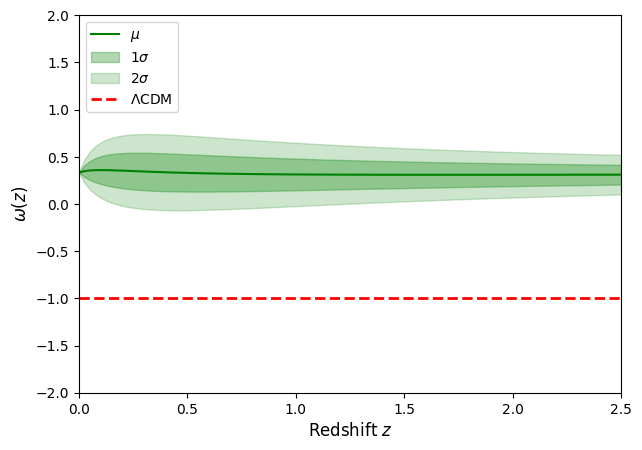

In [24]:
fig = plt.figure(figsize=(7, 5), dpi=100)

k = np.linspace(0, 2.5, 100)
means = eos_array(k, samples, model='rational')
plt.plot(k, means[:, 1], '-', c='g', label='$\mu$')
plt.fill_between(k, means[:, 1] - means[:, 2], means[:, 1] + means[:, 2], alpha=0.3, color='green', label='$1\sigma$')
plt.fill_between(k, means[:, 1] - 2*means[:, 2] , means[:, 1] + 2*means[:, 2], alpha=0.2, color='green', label='$2\sigma$')
plt.ylim(-2, 2)
plt.xlim(0, 2.5)
plt.hlines(y=-1, xmin=0, xmax=2.5, linestyles='--', lw=2, color='r', label='$\Lambda$CDM')
plt.legend(loc='upper left')
plt.xlabel("Redshift $z$", fontsize=12)
plt.ylabel("$\\omega(z)$", fontsize=12)
plt.savefig('NLED_rational_EoS.png', dpi=200)

In [29]:
samples = g.sampleAnalyser.samplesForRoot('NLEDCosmology_phy_HD+Pantheon+CBAO+Planck_15_nested_multi')

p = samples.getParams()
print('mean, err = ', samples.mean(p.Om), samples.std(p.Om))
print('95% limits: ',samples.twoTailLimits(p.Om, 0.95))
# print(samples.likeStats)

print('mean, err = ', samples.mean(p.h), samples.std(p.h))
print('95% limits: ',samples.twoTailLimits(p.h, 0.95))

print('mean, err = ', samples.mean(p.Omrad), samples.std(p.Omrad))
print('95% limits: ',samples.twoTailLimits(p.Omrad, 0.95))


print('mean, err = ', samples.mean(p.b), samples.std(p.b))
print('95% limits: ',samples.twoTailLimits(p.b, 0.95))


# print('mean, err = ', samples.mean(p.beta), samples.std(p.beta))
# print('95% limits: ',samples.twoTailLimits(p.beta, 0.95))
# roots = [
#          'NLEDCosmology_phy_Pantheon+CBAO_mcmc',
#   ]

# roots2 = [
#          'NLED2Cosmology_phy_Pantheon+CBAO_mcmc',
#   ]
# # 

mean, err =  0.36637462411657085 0.07505471155595211
95% limits:  [0.22720226 0.48783623]
mean, err =  0.7412631177916364 0.0829515830486297
95% limits:  [0.5688726  0.88106734]
mean, err =  4.7019915681027434e-05 1.3266111387546545e-05
95% limits:  [3.18545521e-05 7.64116668e-05]
mean, err =  0.045661531194161636 0.14762645317087564
95% limits:  [-0.2006569   0.29551733]


### LCDM

In [8]:
samples = g.sampleAnalyser.samplesForRoot('LCDM_phy_HD+Pantheon+CBAO+Planck_15_nested_multi')

p = samples.getParams()
print('mean, err = ', samples.mean(p.Om), samples.std(p.Om))
print('95% limits: ',samples.twoTailLimits(p.Om, 0.95))
# print(samples.likeStats)

print('mean, err = ', samples.mean(p.h), samples.std(p.h))
print('95% limits: ',samples.twoTailLimits(p.h, 0.95))

print('mean, err = ', samples.mean(p.Omrad), samples.std(p.Omrad))
print('95% limits: ',samples.twoTailLimits(p.Omrad, 0.95))



# print('mean, err = ', samples.mean(p.beta), samples.std(p.beta))
# print('95% limits: ',samples.twoTailLimits(p.beta, 0.95))
# roots = [
#          'NLEDCosmology_phy_Pantheon+CBAO_mcmc',
#   ]

# roots2 = [
#          'NLED2Cosmology_phy_Pantheon+CBAO_mcmc',
#   ]
# # 

mean, err =  0.30047982263255496 0.006377069052380045
95% limits:  [0.28919494 0.31461485]
mean, err =  0.6829980205924834 0.004912520185056359
95% limits:  [0.67246941 0.69208886]
mean, err =  5.301754888318723e-05 7.663389873521407e-07
95% limits:  [5.16257055e-05 5.46820321e-05]
